<a href="https://colab.research.google.com/github/LUCASDNORONHA/Natural_Language_Processing/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Linguagem Natural

In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [6]:
!python -m spacy download pt_core_news_sm

2023-11-17 22:22:30.334332: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 22:22:30.334421: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 22:22:30.334466: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 22:22:31.976006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


# Marcação POS


- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [7]:
pln = spacy.load('pt_core_news_sm')
pln

In [8]:
documento = pln('Estou aprendendo processamento de linguagem natura,curso em Brasília')

In [9]:
type(documento)

spacy.tokens.doc.Doc

In [11]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natura NOUN
, PUNCT
curso NOUN
em ADP
Brasília PROPN


# Lematização e Stemização

In [14]:
for token in documento:
  print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natura natura
, ,
curso curso
em em
Brasília Brasília


In [18]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [19]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [21]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [23]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natura natura natur
, , ,
curso curso curs
em em em
Brasília Brasília brasíl


# Carregamento dos textos

In [29]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [30]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector

In [31]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vec

In [32]:
paragrafos = dados_html.find_all('p')

In [33]:
len(paragrafos)

109

In [34]:
paragrafos[0]

<p><b>Inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:
</p>

In [35]:
paragrafos[1].text

'É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\n'

In [36]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [37]:
conteudo

'Inteligência artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\nO desenvolvimento da área

In [38]:
conteudo = conteudo.lower()
conteudo

'inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. algumas das principais áreas relacionadas à ia incluem:\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\no desenvolvimento da área

# Buscas em textos com spaCY


In [40]:
pln = spacy.load('pt_core_news_sm')
pln

In [41]:
string = 'turing'
token_pesquisa = pln(string)

In [44]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [45]:
doc = pln(conteudo)

matches = matcher(doc)
matches

[(8661325627334373315, 3343, 3344),
 (8661325627334373315, 3353, 3354),
 (8661325627334373315, 3509, 3510),
 (8661325627334373315, 3514, 3515),
 (8661325627334373315, 3520, 3521),
 (8661325627334373315, 3583, 3584),
 (8661325627334373315, 4236, 4237),
 (8661325627334373315, 5501, 5502),
 (8661325627334373315, 8952, 8953),
 (8661325627334373315, 9087, 9088),
 (8661325627334373315, 9182, 9183),
 (8661325627334373315, 9299, 9300)]

In [47]:
doc[3343: 3344]

turing

In [48]:
doc[9299:9300], doc[9299-5:9299+5]

(turing, asiático a vencer o prêmio turing. entre suas contribuições)

In [49]:
doc[5501: 5502], doc[5501-5:5501+5]

(turing, consiga passar pelo teste de turing. ou seja,)

In [54]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3343, 3344), 3343, 3344)

In [65]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:  </strong>{len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f'<mark>{string}</mark')
  texto += '<br /><br />'
display(HTML(f"""... {texto} ..."""))

# Extração de Entidade Nomeadas


- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [66]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

cotidiano).[2 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[3 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[8 PER
prolog MISC
gpt-3[14 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[11][18 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
sub-simbólico"?[25 MISC
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing.[31 LOC
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
int

In [68]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

# Nuvens de Palavras e Stop Words

In [77]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'direita', 'desse', 'diz', 'ser', 'tiveste', 'estiveste', 'quieto', 'baixo', 'dos', 'sistema', 'certamente', 'portanto', 'terceiro', 'vindo', 'ambas', 'pouco', 'quinze', 'conhecido', 'aqueles', 'cento', 'fim', 'quem', 'custa', 'vossos', 'mil', 'tão', 'veja', 'diante', 'povo', 'comprido', 'dezoito', 'valor', 'tens', 'oito', 'momento', 'conselho', 'puderam', 'teus', 'certeza', 'conhecida', 'da', 'ligado', 'dezasseis', 'vários', 'se', 'meu', 'eles', 'alguns', 'pois', 'estiveram', 'estás', 'área', 'podia', 'próxima', 'oitava', 'na', 'for', 'ontem', 'mais', 'te', 'tudo', 'longe', 'debaixo', 'quê', 'outros', 'me', 'des', 'saber', 'ela', 'fazem', 'umas', 'vão', 'posso', 'ou', 'nenhuma', 'teve', 'bem', 'estar', 'oitavo', 'fazeis', 'geral', 'apoio', 'deste', 'dão', 'foram', 'sexto', 'quinto', 'sétima', 'ele', 'tanto', 'tentaram', 'três', 'todo', 'onze', 'quarta', 'de', 'seu', 'já', 'menor', 'treze', 'o', 'esse', 'um', 'boa', 'cinco', 'porquê', 'nós', 'novo', 'fora', 'uma', 'nesta', 'ali', 'som

In [78]:
len(STOP_WORDS)

416

In [80]:
pln.vocab['de'].is_stop

True

In [81]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

print(lista_token)

['inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplinas', '.', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[2', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de', 'dados', 'disponíveis', 'para', 'chegar', 'a', 'um

In [82]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)


In [83]:
len(lista_token)

10224

In [85]:
len(sem_stop)

5974

In [86]:
print(sem_stop)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplinas', '.', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[2', ']', 'considerar', 'características', 'básicas', 'desses', 'sistemas', ',', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'conjunto', 'dados', 'disponíveis', 'chegar', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'acertos', 'futuro', 'possa', 'agir', 'maneira', 'eficaz', ')', ',', 'reconhecer', 'padrões', '(', 'padrões', 'visuais', 'sensoriais', ',', 'padrões', 'comportamento', ')', '

In [71]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['red', 'yellow', 'green', 'blue'])

In [75]:
from wordcloud import WordCloud

cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

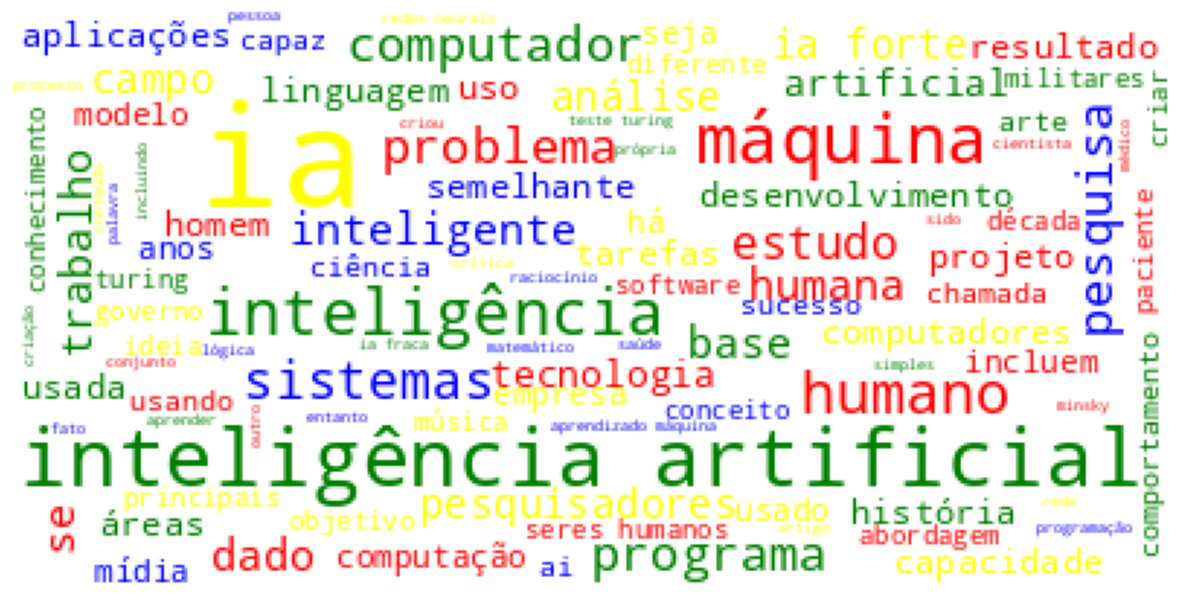

In [88]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()